In [1]:
# importing the dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
import pickle
import joblib

In [2]:
#loading the data from csv file to pandas dataframe
df=pd.read_csv("datasets_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# checking the number of raws and columns
df.shape

(1338, 7)

In [4]:
#checking the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


* categorical features- sex,smoker,region

In [5]:
# statistical measures of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
#checking columns headings
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
#checking for missing data
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* no missing values observed

### Exploratory Data Analysis

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


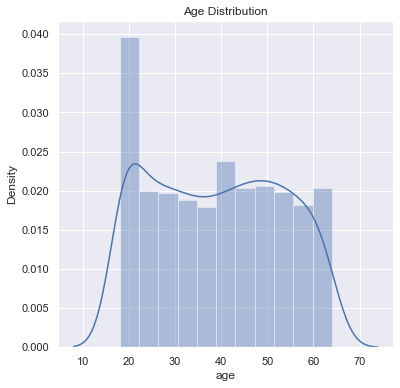

In [8]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

* The minimum age in the dataset is 18 and the maximum age is 64.
* The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages.

In [9]:
df['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

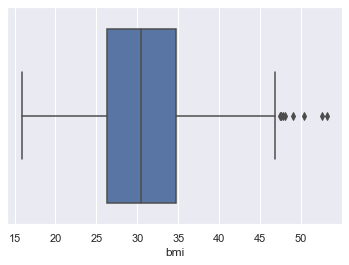

In [10]:
sns.boxplot(df.bmi)

* BMI attribute has outliers above (approximately) 47

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


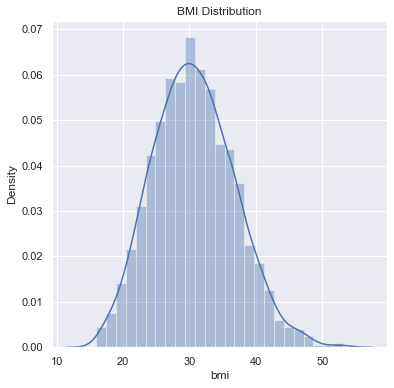

In [11]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

* The measurements of body mass index seem to form a Gaussian distribution centered around the value 30, with a few outliers towards the right.

In [12]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

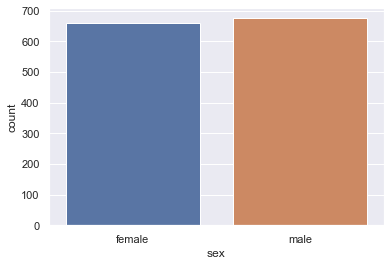

In [13]:
sns.countplot(df.sex)

* Input data contains an even distribution of male and female samples

In [14]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children', ylabel='count'>

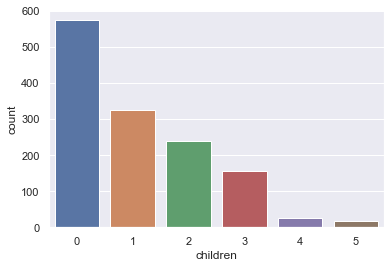

In [15]:
sns.countplot(df.children)

* A major sample of data contains persons with no children(574)
* Persons having 4 or 5 children are comparatevely  very less in data
* it is somewhat positevely skewed

In [16]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

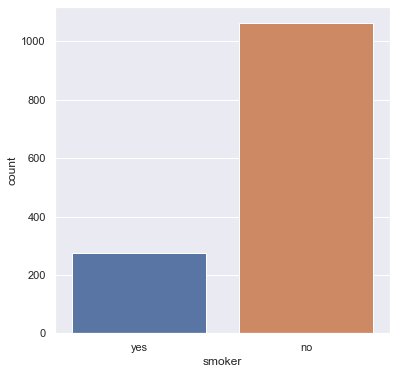

In [17]:
plt.figure(figsize=(6,6))
sns.countplot(x="smoker",data=df)
plt.show()

* Majority of them are non smokers with 1064 samples

In [18]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

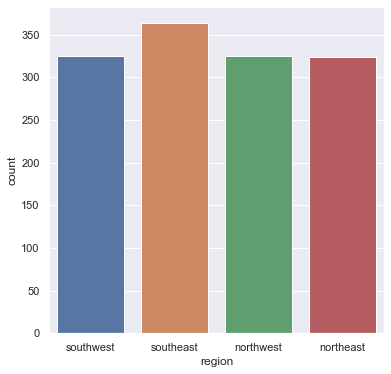

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(x="region",data=df)
plt.show()

* The data is evenly distributed across 4 regions with the region of southeast having slightly more samples.

<AxesSubplot:ylabel='region'>

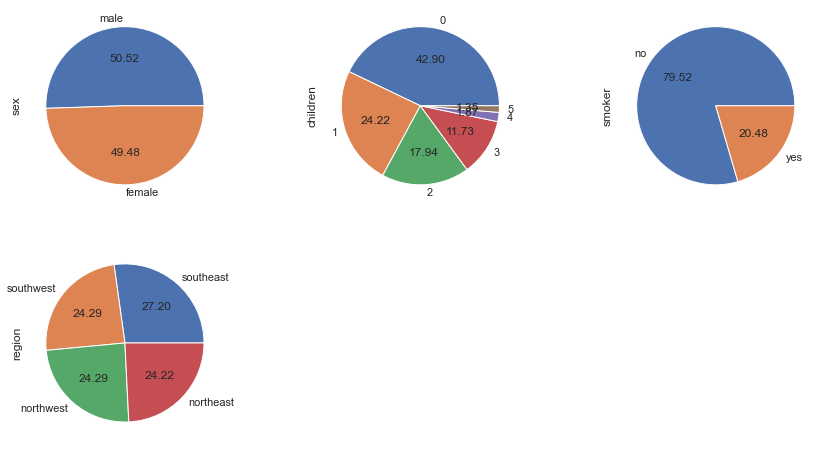

In [20]:
# Plotting piecharts of above informations to display relative proportions and get the point at one glance clearly.
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
df['sex'].value_counts().plot(kind="pie", autopct="%.2f")
plt.subplot(2,3,2)
df['children'].value_counts().plot(kind="pie", autopct="%.2f")
plt.subplot(2,3,3)
df['smoker'].value_counts().plot(kind="pie", autopct="%.2f")
plt.subplot(2,3,4)
df['region'].value_counts().plot(kind="pie", autopct="%.2f")

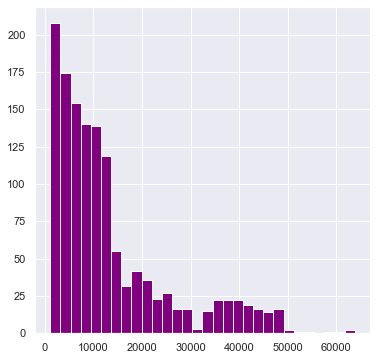

In [21]:
# visualize the distribution of values for target variable
plt.figure(figsize=(6,6))
plt.hist(df.charges, bins = 'auto', color = 'purple')
plt.show()

* Target variable is somewhat positevely skewed
* Unevenly distributed
* very few are charged above 50000

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

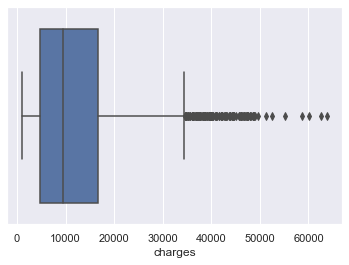

In [22]:
sns.boxplot(df.charges)

* charges attribute has large number of outliers above 35000

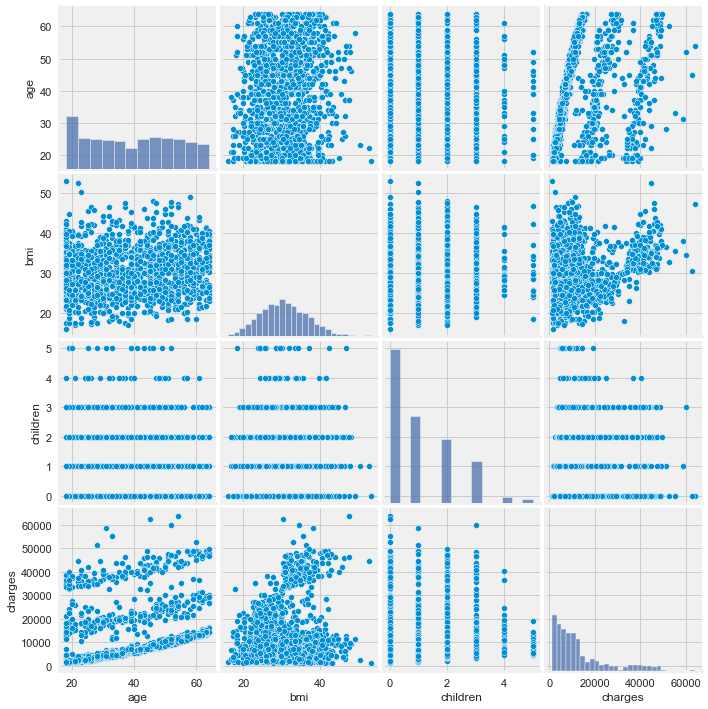

In [25]:
sns.pairplot(df)

<AxesSubplot:>

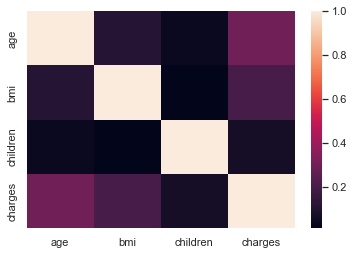

In [24]:
# generate heatmap to visualize strong and weak correlations
sns.heatmap(df.corr())

* There is a highest correlation between charges and whether a person is a smoker
* Lowest correlation between region and charges

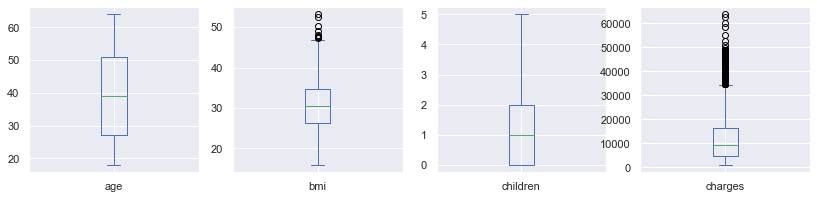

In [25]:
# boxplot
df.plot(kind='box',figsize=(14,14),layout=(4,4),sharex=False,subplots=True);

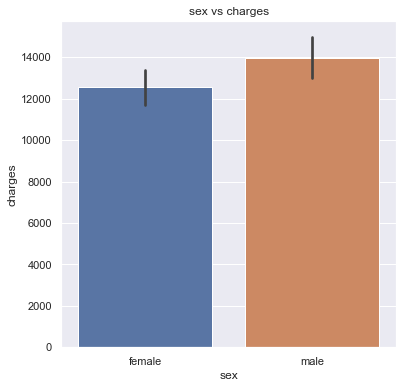

In [26]:
plt.figure(figsize = (6, 6))
sns.barplot(x = 'sex', y = 'charges', data = df)
plt.title('sex vs charges')
plt.show()

* males have slightly greater insurance charges than females in general

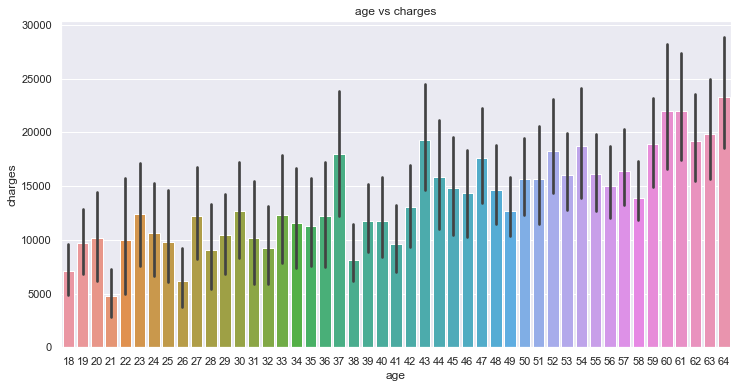

In [27]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'age', y = 'charges', data = df)
plt.title('age vs charges')
plt.show()

* It was roughly estimated that more the age, more will be insurance costed
* insurance cost is highest amoung the age group of 60-69

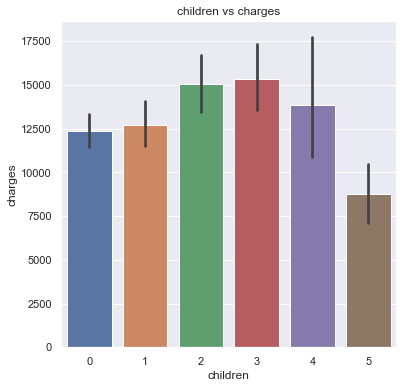

In [28]:
plt.figure(figsize = (6, 6))
sns.barplot(x = 'children', y = 'charges', data = df)
plt.title('children vs charges')
plt.show()

* No of children of a person has very interesting dependency on insurance cost
* Insurance cost are higher among the individuals with 2 or 3 children rather than individuals with 4 or 5 children

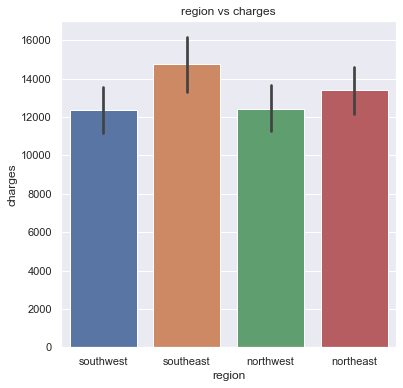

In [29]:
plt.figure(figsize = (6, 6))
sns.barplot(x = 'region', y = 'charges', data = df)
plt.title('region vs charges')
plt.show()

* region actually doesnot play any role in deyermining insurance cost
* Insurance cost are higher among the population in southeast region

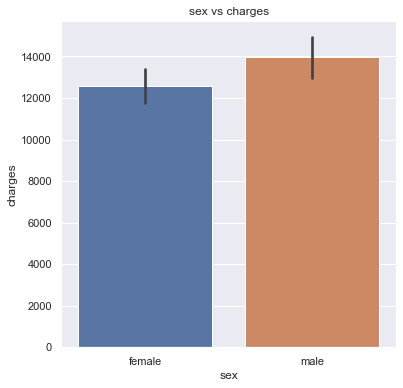

In [30]:
plt.figure(figsize = (6, 6))
sns.barplot(x = 'sex', y = 'charges', data = df)
plt.title('sex vs charges')
plt.show()

* Being a male or female make lesser impact on charges.Eventhough range for males is larger than for females

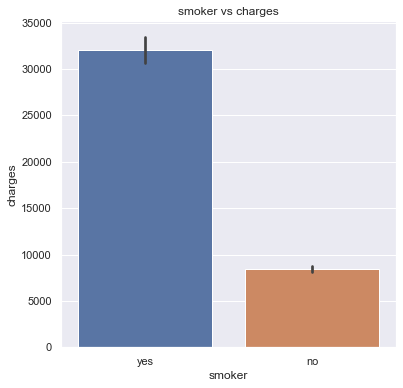

In [31]:
plt.figure(figsize = (6, 6))
sns.barplot(x = 'smoker', y = 'charges', data = df)
plt.title('smoker vs charges')
plt.show()

* Smokers has more insurance chances than non smokers

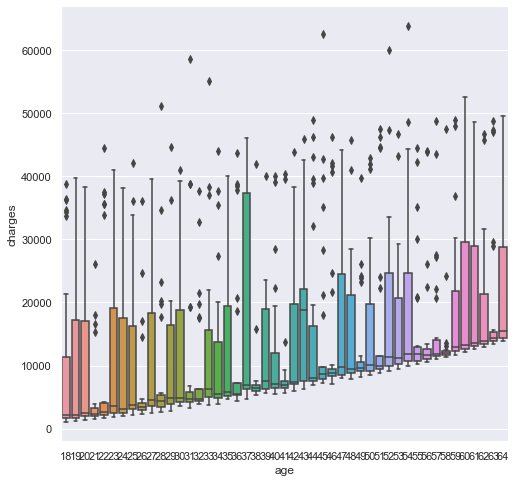

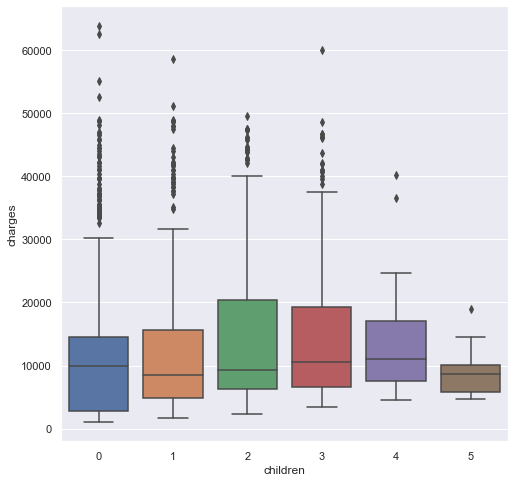

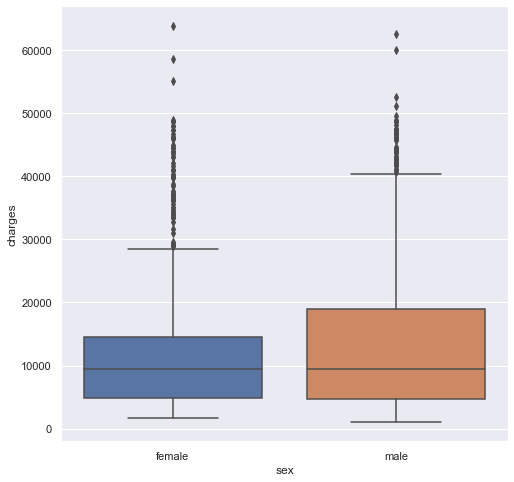

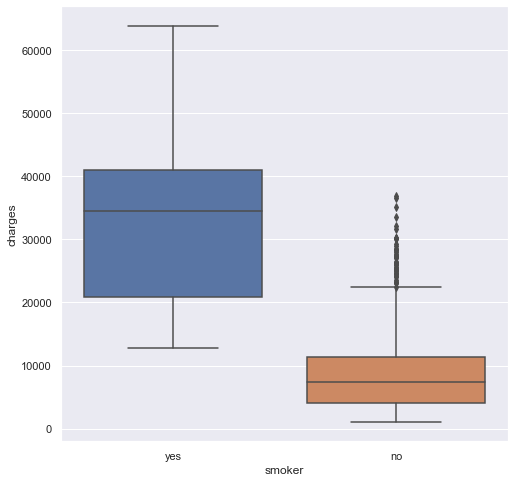

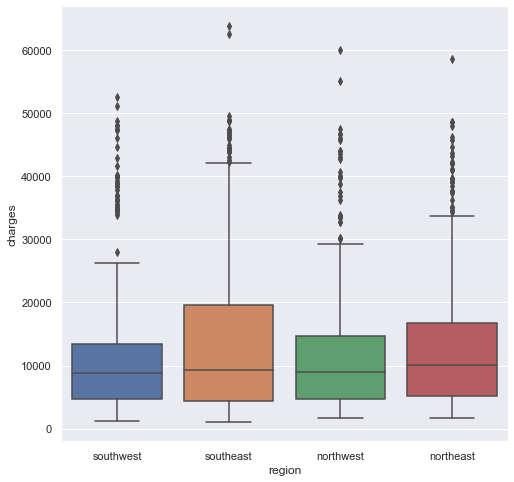

In [32]:
boxs = ['age', 'children', 'sex', 'smoker', 'region']
for box in boxs:
    plt.figure(figsize=(8,8))
    sns.boxplot(x = df[box], y = df['charges'])

#### Age vs charges
* As age increases insurance cost increases.The plot shows an increasing trend in charges starting from around 1000(for age 18-19) to about 10,000(with age near 60).
* This may be due to general medical assumption that younger people are more fit or possess robust immune system.
#### Children vs charges
* persons with 2 childrens are charged more compared to others and those with 5 and 6 are charged less.This may be due to dominance of group with 2 or 3 children in the entire population.
####  Sex vs charges
* males are charged higher in several cases than maximum charges for females.
#### Smoker vs charges
*  shows clear distribution pattern of high charges for beneficiaries who are smokers and considerably low costs for non-smokers.
#### Region vs charges
* Region does not show much correlation with charges,southeast region have larger range upto 20000.This may due to medical cost being higher in the region or may be it is a well- developed area with higher cost of living.

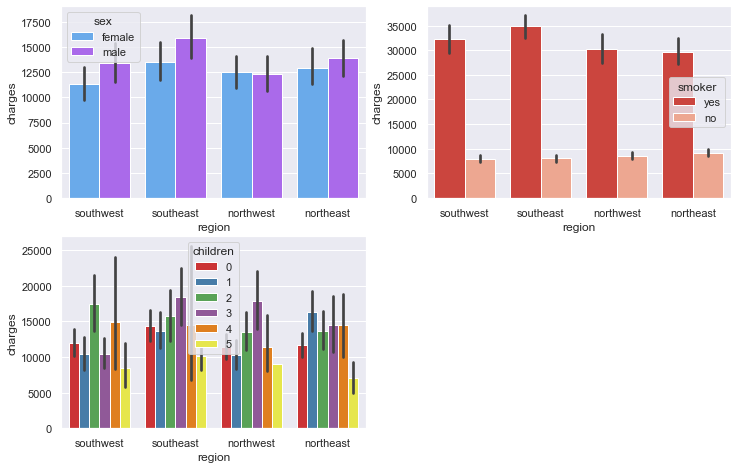

In [33]:
fig = plt.figure(1, (12, 12))
plt.subplot(3,2,1)
ax=sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')
plt.subplot(3,2,2)
ax=sns.barplot(x="region", y="charges", hue="smoker", data=df, palette = 'Reds_r')
plt.subplot(3,2,3)
ax=sns.barplot(x="region", y="charges", hue="children", data=df, palette = 'Set1')

* highest charges due to smoking are  in the Southeast but the lowest are in the Northeast
* People in the Southwest generally smoke more than people in the Northeast
* people in the Northeast have higher charges by gender than in the Southwest and Northwest overall
* people with children tend to have higher medical costs overall as well

C:\Users\HP\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\re

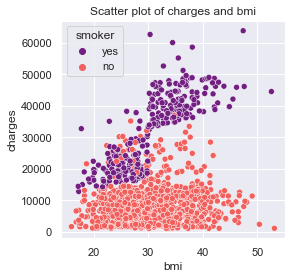

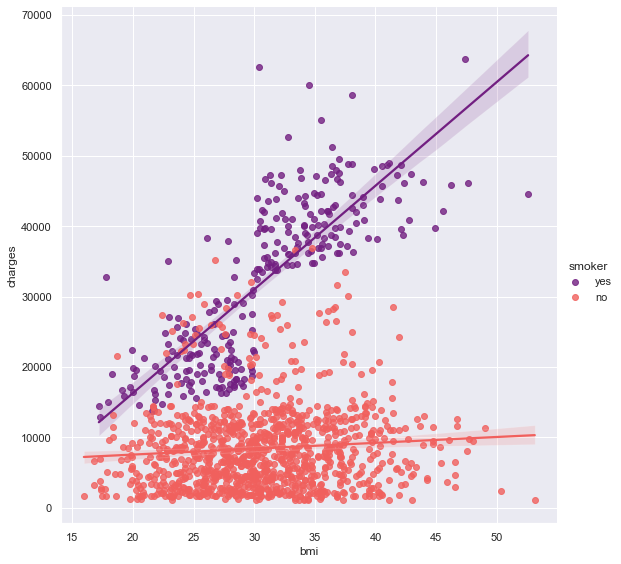

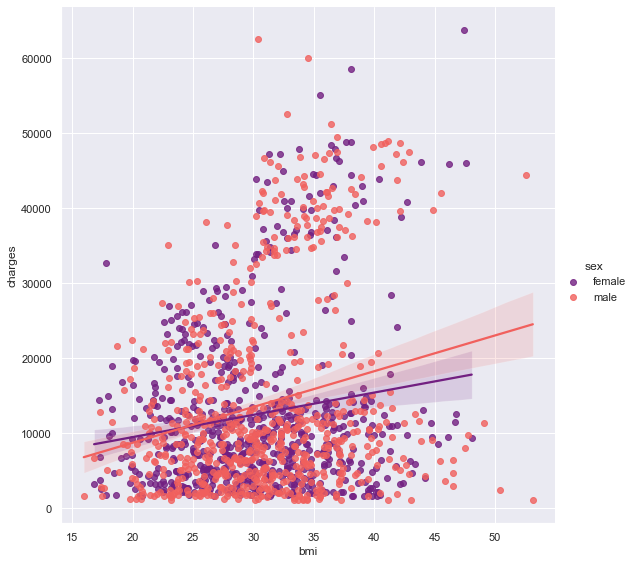

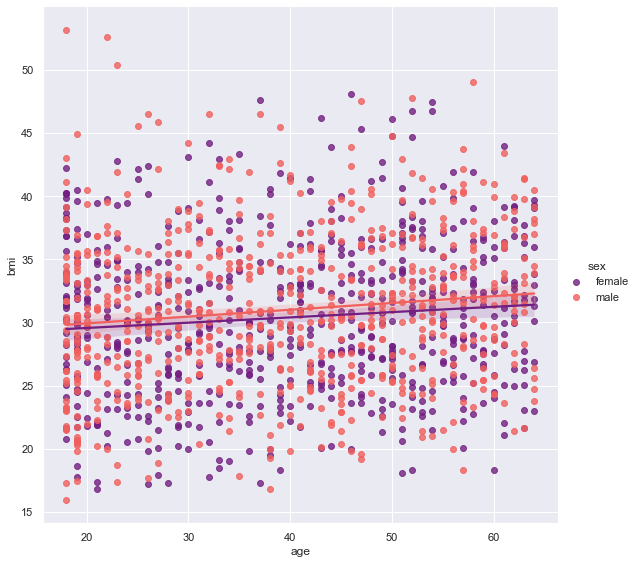

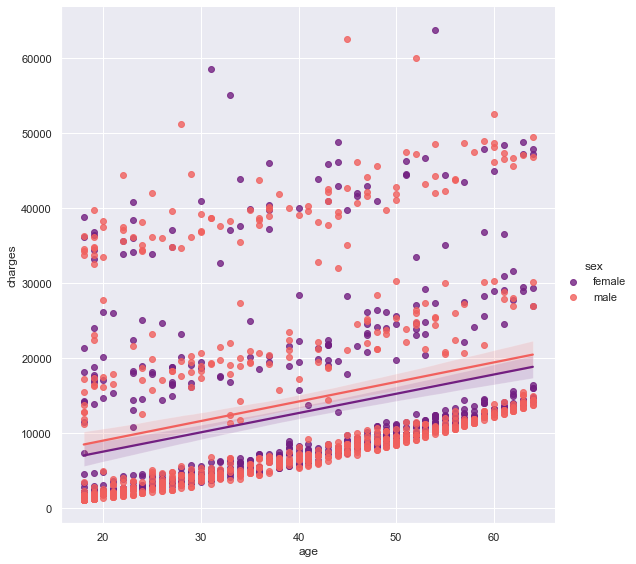

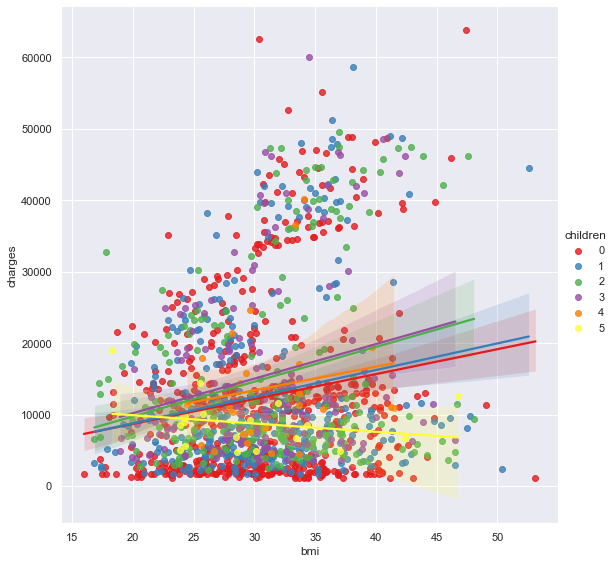

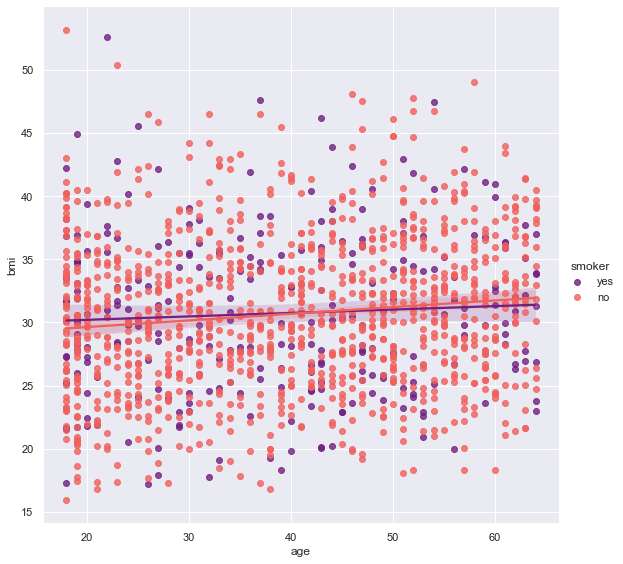

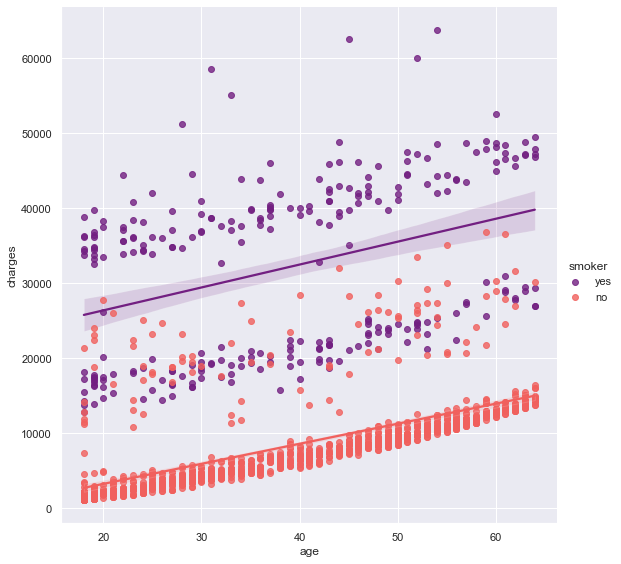

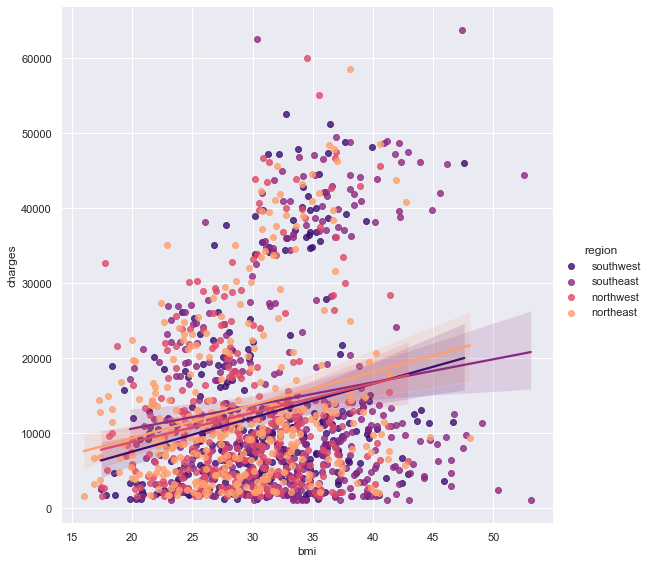

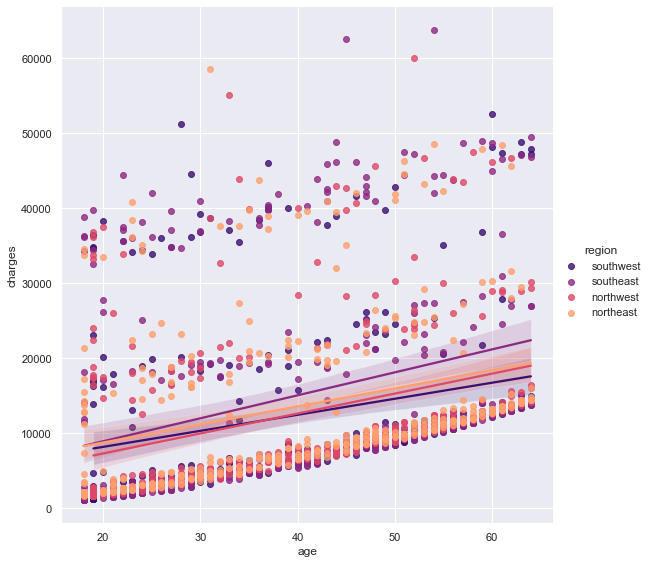

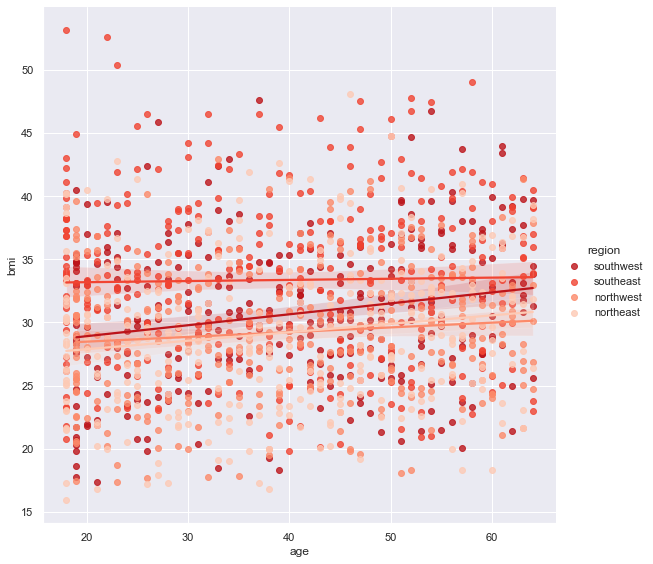

In [34]:
# scatter plots 
plt.figure(figsize=(4,4))
ax = sns.scatterplot(x='bmi',y='charges',data=df,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=df, palette = 'magma', size = 8)
sns.lmplot(x="bmi", y="charges", hue="sex", data=df, palette = 'magma', size = 8)
sns.lmplot(x="age", y="bmi", hue="sex", data=df, palette = 'magma', size = 8)
sns.lmplot(x="age", y="charges", hue="sex", data=df, palette = 'magma', size = 8)
sns.lmplot(x="bmi", y="charges", hue="children", data=df, palette = 'Set1', size = 8)
sns.lmplot(x="age", y="bmi", hue="smoker", data=df, palette = 'magma', size = 8)
sns.lmplot(x="age", y="charges", hue="smoker", data=df, palette = 'magma', size = 8)
sns.lmplot(x="bmi", y="charges", hue="region", data=df, palette = 'magma', size = 8)
sns.lmplot(x="age", y="charges", hue="region", data=df, palette = 'magma', size = 8)
sns.lmplot(x="age", y="bmi", hue="region", data=df, palette = 'Reds_r', size = 8)

### Data pre-processing

In [35]:
df.replace({'sex':{'male':0,'female':1}},inplace=True)
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)



In [36]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [37]:
# splitting the dependent and independent variable
X = df.drop(columns='charges', axis=1)
y = df['charges']

In [38]:
 # splitting the dataset into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

### Linear Regression

In [39]:
model=LinearRegression()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)

In [40]:
y_predict

array([11314.55649519,  9505.58891773, 38360.58383815, 16449.59640407,
        7117.89379839,  3625.40607824,  1220.82286678, 14546.23034668,
        9175.38911418,  7670.45320003,  4137.50251413, 10460.04576612,
        8937.02424204,  3821.65458782, 28121.9236222 , 10727.21593537,
       11492.35478865,  5741.04672175,  8414.69398732, 26801.81210287,
       33848.38568362, 14527.74171334, 11390.85379777, 32180.53730024,
        4178.01083124,  8887.21190336,   744.58537141,  9803.59635122,
        3791.46686472, 10607.59311526,  9175.47238397, 40104.40338991,
       15833.68613995, 14020.43761781, 24429.83851219,  4812.11477907,
       12615.54616137, 30908.11622546, 33731.94909917,  3794.59535793,
        3636.61843919,  4007.71037332, 30202.73392169, 39695.63095105,
       27824.21897431,  5247.42299012, 10616.83293985,  8014.84064366,
        3241.96543926, 10245.23684269,  5352.03102501,  3581.85961167,
       33183.50761881, 38119.35302412, 16065.17314482,  6802.84856411,
      

In [41]:
print("MSE : ",mean_squared_error(y_predict,y_test))
print("MAE : ",mean_absolute_error(y_predict,y_test))
print("R Score :",r2_score(y_predict,y_test))

MSE :  31987105.23679421
MAE :  3954.1892639155058
R Score : 0.7254224491691765


### Polynomial linear regression

In [42]:
polynomial_features = PolynomialFeatures(degree=3)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.fit_transform(X_test)
polynomial_reg = LinearRegression(fit_intercept= False)
polynomial_reg.fit(X_train_poly,y_train)
y_predict = polynomial_reg.predict(X_test_poly)

In [43]:
y_predict

array([10733.81226746, 10202.79682049, 52186.12477005, 14497.57734713,
       10903.15596577,  6041.88261101,  3575.25125812, 14371.70228093,
        8808.69501191,  8034.38847005,  7967.98938105, 11285.58522138,
        8638.18789462,  5308.27967906, 23067.40876256, 12583.84253709,
       13697.46040574,  6554.41176709,  8772.00550505, 26548.36938217,
       24663.66229218, 15362.60387912, 11501.29987402, 29543.76193952,
        4158.62575582,  8212.26999598,  6712.70298564,  8643.2605756 ,
        4743.82460625, 11081.99083984,  8964.3298528 , 53193.92770961,
       12633.43779192, 10827.75064272, 14174.4665272 ,  5284.60137626,
       10228.89572295, 37432.72605228, 39087.3682791 ,  2992.69199154,
        7542.48042594,  4435.70422601, 25772.19841641, 49546.92856076,
       34715.55298082,  7593.57931151, 12541.45369762,  8759.45404355,
        6984.26119562, 14190.11563751,  4442.23324701,  8313.64887907,
       30448.78732573, 48108.4853087 , 12151.39226123,  5597.5937321 ,
      

In [44]:
print("MSE : ",mean_squared_error(y_predict,y_test))
print("MAE : ",mean_absolute_error(y_predict,y_test))
print("R Score :",r2_score(y_predict,y_test))

MSE :  18987181.903772086
MAE :  2896.981196386016
R Score : 0.8648980276891193


### Decision tree regression

In [45]:
decision_tree_reg = DecisionTreeRegressor(max_depth = 5,random_state=13)
decision_tree_reg.fit(X_train,y_train)
y_predict = decision_tree_reg.predict(X_test)

In [46]:
y_predict

array([11934.19241196, 10708.71359333, 44877.43999733, 15081.96148341,
        8642.17142692,  6967.54775731,  2093.29232403, 11727.76697226,
        6967.54775731,  6273.72011289,  6967.54775731, 11727.76697226,
        9114.10500846,  6967.54775731, 21117.58275429, 10708.71359333,
       15081.96148341,  6273.72011289,  6967.54775731, 35446.83936   ,
       24626.51984833, 14700.43297756, 11934.19241196, 27111.8123    ,
        3643.71749349,  6273.72011289,  4307.41898046,  6967.54775731,
        4307.41898046, 11727.76697226,  6967.54775731, 44877.43999733,
       15081.96148341, 11934.19241196, 16960.88346324,  4307.41898046,
        9114.10500846, 35446.83936   , 39901.13293583,  3643.71749349,
        6967.54775731,  4307.41898046, 19557.98711364, 44877.43999733,
       35446.83936   , 10051.70551333, 10708.71359333,  6967.54775731,
        6273.72011289, 11934.19241196,  4307.41898046, 10051.70551333,
       27111.8123    , 44877.43999733, 11934.19241196,  4307.41898046,
      

In [47]:
print("MSE : ",mean_squared_error(y_predict,y_test))
print("MAE : ",mean_absolute_error(y_predict,y_test))
print("R Score :",r2_score(y_predict,y_test))

MSE :  25201418.26459095
MAE :  2755.838436169079
R Score : 0.8454891106822915


### Random forest regression

In [48]:
random_forest_reg = RandomForestRegressor(n_estimators=400, max_depth=5, random_state=13)
random_forest_reg.fit(X_train, y_train)
y_predict = random_forest_reg.predict(X_test)

In [49]:
y_predict

array([12302.70550738, 10282.13714467, 44385.61008302, 14125.5475656 ,
       11030.2870003 ,  7277.88742667,  2577.270857  , 12777.95030804,
        7359.84255597,  6805.99421283,  7198.68513289, 12897.14115938,
        8642.6749496 ,  5740.53501201, 21876.18074284, 11717.04794107,
       14011.67522883,  5619.52804621,  7156.955582  , 34961.74704849,
       24078.10349821, 14410.06060192, 12175.20432499, 28051.00307648,
        3062.05047455,  6781.1904249 ,  6870.17825023,  7300.39021646,
        4835.93306806, 10605.00495636,  7395.17448181, 46515.32504598,
       14178.54459723, 11938.95092188, 16735.19284808,  5278.96173473,
        9722.34218117, 37647.79795761, 41444.43297077,  3024.21673209,
        7257.95939143,  4853.73990216, 19763.77013118, 46304.13354231,
       37297.29576931,  6081.67973182, 11717.04794107,  7131.29137836,
        6260.36754661, 12638.46616693,  4291.61175139,  7070.26774987,
       27012.09154019, 46526.11532525, 12015.03938644,  5920.61163189,
      

In [50]:
print("MSE : ",mean_squared_error(y_predict,y_test))
print("MAE : ",mean_absolute_error(y_predict,y_test))
print("R Score :",r2_score(y_predict,y_test))

MSE :  16630463.716306182
MAE :  2456.770918440898
R Score : 0.8862659230910114


In [52]:
joblib.dump(random_forest_reg,'deployment123.pkl')

['deployment123.pkl']